In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print('done')

done


In [90]:
medications_df = pd.read_csv("datasets/medications.csv",encoding="ISO-8859-1")
examination_df = pd.read_csv("datasets/examination.csv", encoding="ISO-8859-1")
demographic_df = pd.read_csv("datasets/demographic.csv", encoding="ISO-8859-1")
labs_df = pd.read_csv("datasets/labs.csv", encoding="ISO-8859-1")
questionnaire_df = pd.read_csv("datasets/questionnaire.csv", encoding="ISO-8859-1")
diet_df = pd.read_csv("datasets/diet.csv", encoding="ISO-8859-1")

# df_combined = pd.merge(medications_df, examination_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, demographic_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, labs_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, questionnaire_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, diet_df, on='SEQN', how='outer')



print(medications_df.info())
print(examination_df.info())
print(demographic_df.info())
print(labs_df.info())
print(questionnaire_df.info())
print(diet_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      20194 non-null  int64  
 1   RXDUSE    20194 non-null  int64  
 2   RXDDRUG   14100 non-null  object 
 3   RXDDRGID  14016 non-null  object 
 4   RXQSEEN   14019 non-null  float64
 5   RXDDAYS   14018 non-null  float64
 6   RXDRSC1   14022 non-null  object 
 7   RXDRSC2   714 non-null    object 
 8   RXDRSC3   127 non-null    object 
 9   RXDRSD1   13633 non-null  object 
 10  RXDRSD2   714 non-null    object 
 11  RXDRSD3   127 non-null    object 
 12  RXDCOUNT  14100 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175

In [91]:

# in madication take all

#in examintions
useful_columns = [
    'SEQN',
    'PEASCST1', 'BPXCHR', 'BPXPULS', 'BPXPTY', 'BMXBMI', 'BMXWT', 'BMXHT', 
    'BMXWAIST', 'CSXSMKOD', 'CSXEXCMT', 'CSQ260A', 'CSQ460', 'CSQ470', 'CSQ480','CSQ450',
    'CSXEXSTS', 'CSXNAST', 'CSXSOAOD', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPACSZ', 'BPAARM'
]

# Create a new DataFrame with the selected columns
examination_df = examination_df[useful_columns]

#in demographic
useful_columns = [
    'SEQN',
    'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3',
    'DMDBORN4', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'DMQMILIZ', 'DMQADFC',
    'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4',
    'DMDHSEDU', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR',
    'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'SIALANG', 'SIAPROXY', 'SIAINTRP',
    'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA'
]

# Create a new DataFrame with the selected columns
demographic_df = demographic_df[useful_columns]

# in labs
useful_columns = [
    'SEQN',
    'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
    'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBDSBUSI', 'LBXHGB',
    'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXPLTSI', 'LBXMPSI', 'LBXSCA', 'LBDSCASI',
    'LBXSCH', 'PHQ020', 'PHACOFHR', 'PHACOFMN', 'GTDSCMMN', 'GTDDR1MN', 'GTXDRANK',
    'URXUCR', 'URXUIO', 'URXUPB', 'URXUSB', 'LBXBPB', 'LBDBPBSI', 'LBDBPBLC', 'LBXTC',
    'LBDTCSI', 'LBXEMA', 'LBXBMN', 'LBDBMNSI', 'LBDBMNLC', 'LBXHCR', 'LBXHCG', 'LBDHEG',
    'URXUP8', 'URDUP8LC', 'URXNO3', 'URDNO3LC', 'LBXIN', 'LBDINSI'
]

# Create a new DataFrame with the selected columns
labs_df = labs_df[useful_columns]

#in questionnaire
useful_columns = [
    'SEQN',
    'AUQ136',
    'ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130','ALQ151',
    'CSQ010','CSQ040',
    'HIQ031B', 'HIQ031C',
    'BPQ020', 'BPQ030', 'BPD035', 'BPQ080', 'BPQ056','BPQ059',
    'HSD010',
    'HSQ500', 'HSQ520','HSQ571','HSAQUEX',
    'DIQ010', 'DIQ050', 'DIQ080','DIQ175A','DIQ160',
    'ACD011B', 'ACD011C', 'ACD040',
    'CDQ001', 'CDQ005', 'CDQ008','CDQ009A','CDQ009H',
    'CSQ140', 'CSQ200','CSQ202','CSQ250',
    'CBD070', 'CBD090', 'CBD110','CBD130',
    'CBQ611','CBQ550',
    'DEQ034A', 'DEQ034C',
    'DED120',
    'DLQ010', 'DLQ020', 
    'DPQ010','DPQ100',
    'DUQ200',
    'ECD010',
    'DBQ010','DBD030','DBQ073A','DBQ700',
    'DBD900',
    'FSD052','FSD041','FSDHH','FSDAD','FSD151',
    'ECQ020', 'ECD070A', 'ECQ080',
    'PFQ020', 'PFQ030', 'PFQ033','PFQ049','PFQ061A','PFQ061O','PFQ090',
    'MCQ080E', 'MCQ160A', 'MCQ180A','MCQ010','MCQ070','MCQ080','MCQ230A','MCQ240AA','MCQ240L','MCQ370A','MCQ300A',
    'OCD150','OCQ180','OCQ260','OCD270','OHQ030','OHQ770','OHQ780F','OHQ555G','OHQ565','OHQ580','OHQ620','OHQ870','OHQ900',
    'OSQ010A','OSQ020A','OSD030AA','OSD030BA','OSD050BB','OSQ040BF','OSQ040BH','OSQ080','OSQ120C','OSD110G','OSQ090H','OSQ150','OSQ170',
    'HEQ010','HEQ030',
    'HIQ011','HIQ260','HIQ270',
    'HOD050','HOQ065','HUQ010','HUQ041','HUQ051','HUD080',
    'IMQ011','IMQ040','IMQ090',
    'INQ020','INQ030',
    'IND235','INDFMMPI',
    'AGQ030',
    'PAQ605','PAD615','PAQ635','PAQ670','PAQ650','PAQ724B','PAQ724I','PAQ724O','PAQ731','PAQ762',
    'PAAQUEX','PUQ100',
    'RHQ010','RHQ060','RHQ076','RHQ160','RHD180','RHQ200','RHQ542A','RHQ570','RXQ510','RXQ520','RXD530',
    'SLQ050','SMQ020','SMQ040','SMD055','SMD650','SMD100BR','SMQ670','SMD460','SMQ858','SMQ870','SMAQUEX.x','SMQ710','SMQ690G','SMQ800','SMDANY',
    'SXQ700','SXD171','SXQ636','SXQ260','SXQ270','SXQ294',
    'WHD010','WHQ040','WHQ070',
    'WHD080A','WHD080C','WHD110','WHD140','WHQ150','WHQ520'
]

# Create a new dataframe
questionnaire_df = questionnaire_df[useful_columns]

#in diet
useful_columns = [
    'SEQN',
    'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 
    'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 
    'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 
    'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1DAY', 
    'DR1DBIH', 'DR1HELPD', 'DR1LANG', 'DRDINT'
]

# Create a new dataframe
diet_df = diet_df[useful_columns]




In [92]:
# merge all dataframes
df = pd.merge(medications_df, examination_df, on='SEQN', how='outer')
df = pd.merge(df, labs_df, on='SEQN', how='outer')
df = pd.merge(df, questionnaire_df, on='SEQN', how='outer')
df = pd.merge(df, diet_df, on='SEQN', how='outer')
df = pd.merge(df, demographic_df, on='SEQN', how='outer')

# drop SEQN column
df = df.drop('SEQN', axis=1)
print(df.info())
print(type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>


In [93]:
# Cleaning data
for column in df.columns:
    
    if df[column].dtype in ['float64', 'int64']:  
        df[column].fillna(df[column].mean(), inplace=True)  
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)  

print(df.info())


C:\Users\Asus\AppData\Local\Temp\ipykernel_27048\225119423.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27048\225119423.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None


In [94]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
RXDUSE      0
RXDDRUG     0
RXDDRGID    0
RXQSEEN     0
RXDDAYS     0
           ..
FIAINTRP    0
MIALANG     0
MIAPROXY    0
MIAINTRP    0
AIALANGA    0
Length: 337, dtype: int64


In [95]:

# Get all object columns
print(df.info())
object_columns = df.select_dtypes(include=['object']).columns
def hashing_encoder(col, num_buckets=10):
    return col.apply(lambda x: hash(x) % num_buckets)
# Apply hashing to each categorical column
num_buckets = 141  # Adjust the number of buckets as needed
for col in object_columns:
    df[col] = hashing_encoder(df[col], num_buckets)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(28)
memory usage: 51.9 MB
None


In [96]:
print(df.head(5))

   RXDUSE  RXDDRUG  RXDDRGID   RXQSEEN      RXDDAYS  RXDRSC1  RXDRSC2  \
0       1      114       108  1.165276  3917.636039       91       12   
1       1       10       137  2.000000  1460.000000       60       12   
2       1       33        99  1.000000   243.000000       37       12   
3       1       20       138  1.000000   365.000000       60       12   
4       1       30        57  1.000000    14.000000       64       12   

   RXDRSC3  RXDRSD1  RXDRSD2  ...  SIALANG  SIAPROXY  SIAINTRP  FIALANG  \
0      100       69       16  ...        1       2.0         2      1.0   
1      100       62       16  ...        1       2.0         2      1.0   
2      100       43       16  ...        1       2.0         2      1.0   
3      100       62       16  ...        1       2.0         2      1.0   
4      100      135       16  ...        1       2.0         2      1.0   

   FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  AIALANGA  
0       2.0       2.0      1.0       2.0       

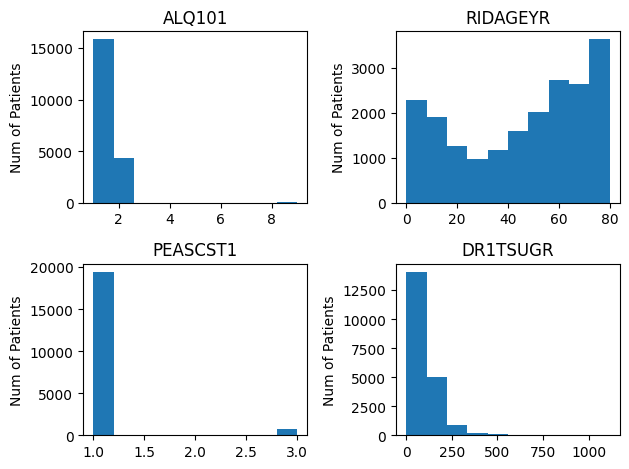

In [97]:
# RIDAGEYR is age in year , PEASCST1 id blood pressure , DR1TSUGR is sugar, ALQ101 is alcohol 
cols = ['ALQ101','RIDAGEYR','PEASCST1','DR1TSUGR']

fig, ax = plt.subplots(2, 2)
for i, col in enumerate(cols):
    ax[i//2, i%2].hist(df[col])
    ax[i//2, i%2].set_title(col)
    ax[i//2, i%2].set_ylabel("Num of Patients")
plt.tight_layout()

In [98]:

df

,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,...,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA
0,1,114,108,1.165276,3917.636039,91,12,100,69,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
1,1,10,137,2.000000,1460.000000,60,12,100,62,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
2,1,33,99,1.000000,243.000000,37,12,100,43,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
3,1,20,138,1.000000,365.000000,60,12,100,62,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
4,1,30,57,1.000000,14.000000,64,12,100,135,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20189,2,137,108,1.165276,3917.636039,91,12,100,69,16,...,1,2.0,2,1.0,2.0,2.0,1.000000,2.000000,2.000000,1.000000
20190,2,137,108,1.165276,3917.636039,91,12,100,69,16,...,1,1.0,2,1.0,2.0,2.0,1.050098,1.989275,1.968501,1.094116
20191,2,137,108,1.165276,3917.636039,91,12,100,69,16,...,1,2.0,2,1.0,2.0,2.0,1.050098,1.989275,1.968501,1.094116
20192,2,137,108,1.165276,3917.636039,91,12,100,69,16,...,1,1.0,2,1.0,2.0,2.0,1.050098,1.989275,1.968501,1.094116


In [99]:
print(df.columns[300:338])

Index(['RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'DMDBORN4',
       'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'DMQMILIZ', 'DMQADFC',
       'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHSEDU', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'WTINT2YR',
       'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'SIALANG', 'SIAPROXY', 'SIAINTRP',
       'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP',
       'AIALANGA'],
      dtype='object')


In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(28)
memory usage: 51.9 MB
None


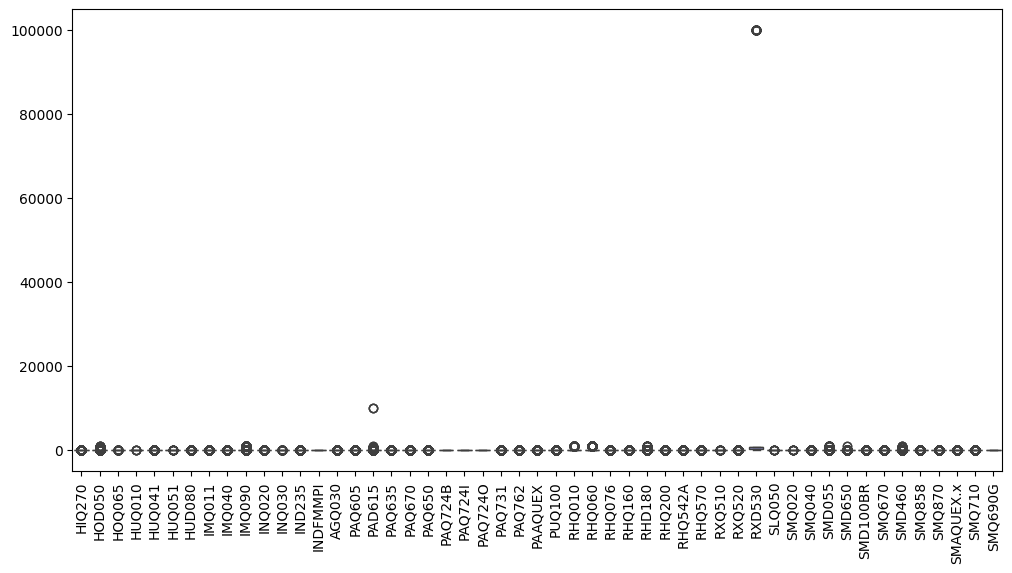

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df.columns[200:251]
# Boxplot to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df_num])
plt.xticks(rotation=90)
plt.show()


In [102]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)
print(df_scaled.shape)


[[ 0.          0.14606742  0.19148936 ...  0.          0.
   0.        ]
 [ 0.         -1.02247191  0.80851064 ...  0.          0.
   0.        ]
 [ 0.         -0.76404494  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.          0.40449438  0.19148936 ... -0.01072517 -0.03149942
   1.        ]
 [ 1.          0.40449438  0.19148936 ... -0.01072517 -0.03149942
   1.        ]
 [ 1.          0.40449438  0.19148936 ...  0.          0.
   1.        ]]
(20194, 337)


In [103]:
import numpy as np
print(np.isnan(df_scaled).sum())  # Count missing values


0


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cols=['BMXBMI','RIAGENDR','RIDAGEYR','BMXHT','BMXWT']
target_column = "BMXBMI"
df_BMI = df[cols]

scaler = StandardScaler()
x = df_BMI.drop(columns=[target_column])
y = df_BMI[target_column]
X_scaled = scaler.fit_transform(x)

# 7️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8️⃣ Train the Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9️⃣ Predict on Test Data
y_pred = model.predict(X_test)

# 🔟 Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 R² Score: {r2:.2f}")


📌 Mean Absolute Error (MAE): 0.06
📌 Mean Squared Error (MSE): 0.06
📌 R² Score: 1.00


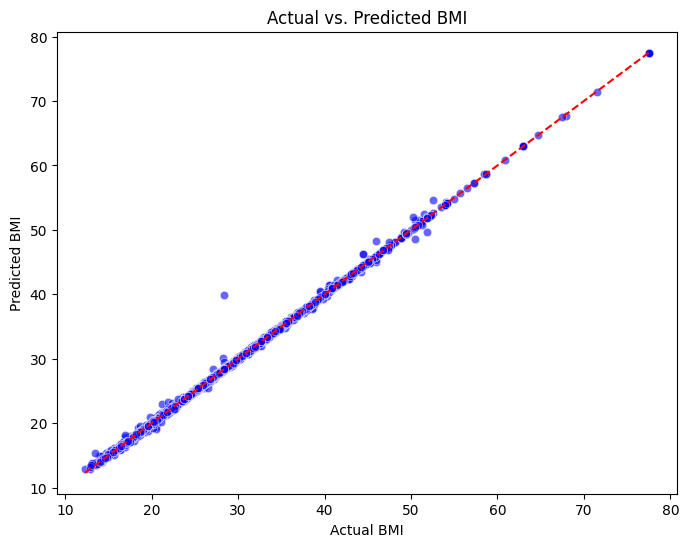

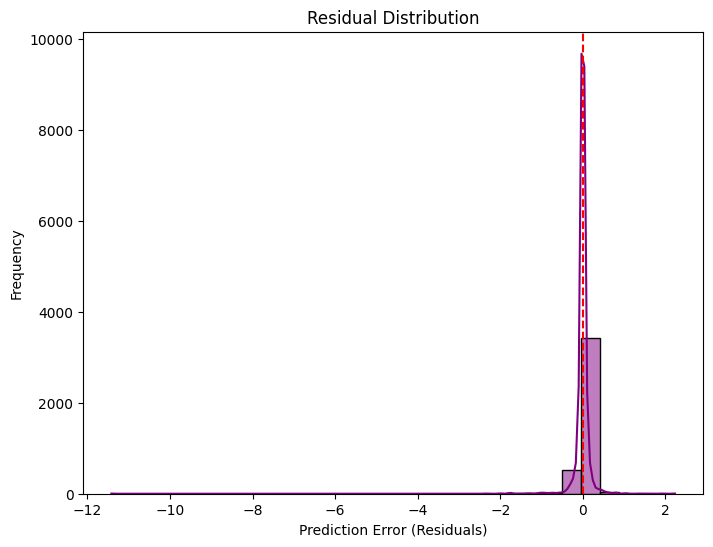

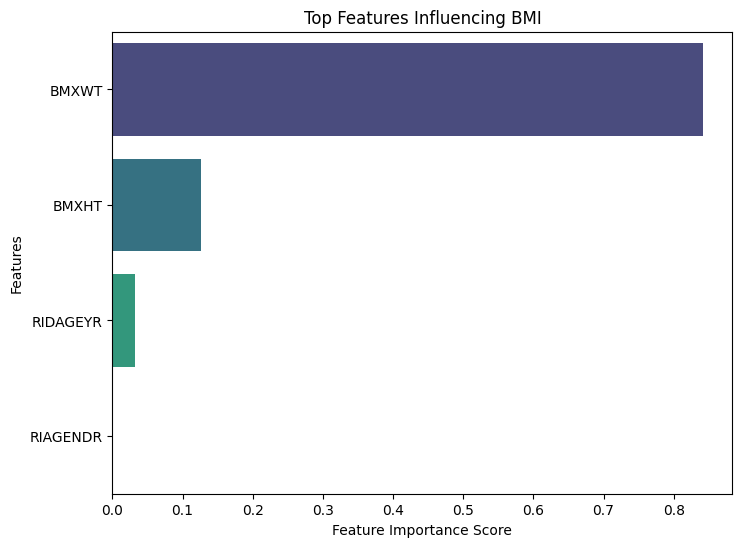

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Scatter Plot: Actual vs. Predicted BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal Line
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs. Predicted BMI")
plt.show()

# 🔹 Residual Plot: Errors Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 🔹 Feature Importance: Key Factors Affecting BMI
feature_importance = model.feature_importances_
feature_names = x.columns

# Sort by importance
sorted_idx = np.argsort(feature_importance)[::-1][:10]  # Top 10 features
plt.figure(figsize=(8, 6))
sns.barplot(
    x=feature_importance[sorted_idx], 
    y=np.array(feature_names)[sorted_idx], 
    hue=np.array(feature_names)[sorted_idx], 
    palette="viridis",
    legend=False  
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Influencing BMI")
plt.show()


In [106]:
# test the model with real data

# Gender (1 = Male, 2 = Female)
# Age (in years)
# Height (in cm)
# Weight (in kg)

gender = 2
age = 20
height = 150
weight = 55

user_data = np.array([[gender, age, height, weight]])

user_data_scaled = scaler.transform(user_data)

predicted_bmi = model.predict(user_data_scaled)[0]
    
def bmi_risk_classification(bmi):
    if bmi < 18.5:
        return "Underweight (Risk: Nutritional Deficiency)"
    elif 18.5 <= bmi < 25:
        return "Normal (Healthy Range)"
    elif 25 <= bmi < 30:
        return "Overweight (Risk: Diabetes, Heart Disease)"
    else:
        return "Obese (High Risk of Diabetes, Heart Disease)"
    
print(f"\n📌 Predicted BMI: {predicted_bmi:.2f}")
print(f"🏥 Health Classification: {bmi_risk_classification(predicted_bmi)}")





📌 Predicted BMI: 24.48
🏥 Health Classification: Normal (Healthy Range)


r:\programs\tense\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


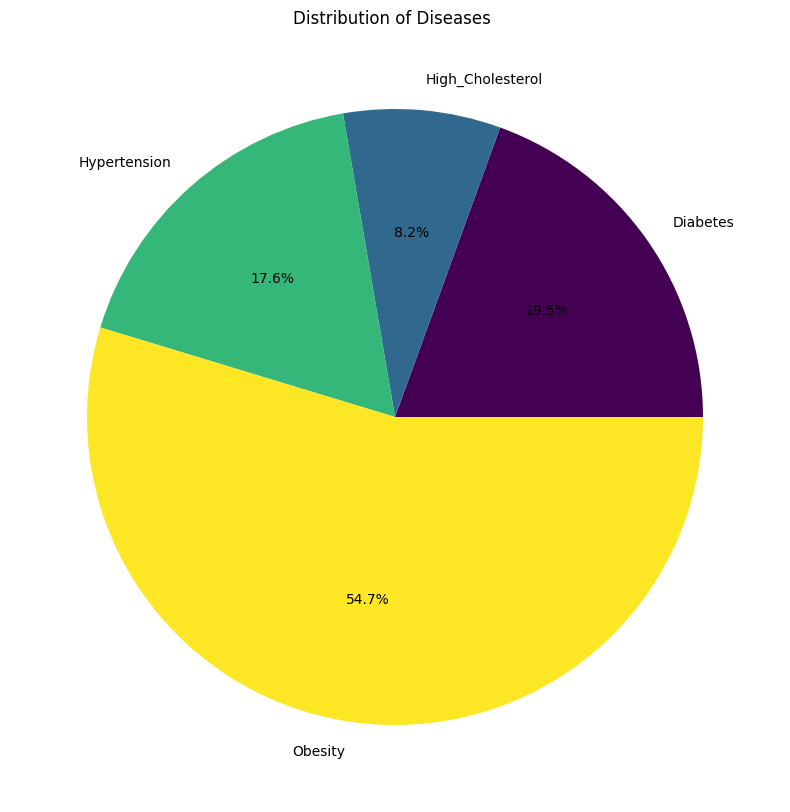

In [107]:
df['Hypertension'] = (df['BPXSY1'] >= 140) | (df['BPXDI1'] >= 90)
df['Diabetes'] = (df['DIQ010'] == 1)
df['Obesity'] = (df['BMXBMI'] >= 30)
df['High_Cholesterol'] = (df['LBXTC'] >= 240)  
targets = ['Hypertension', 'Diabetes', 'Obesity', 'High_Cholesterol']
target_df = df[targets]

target_df = target_df[target_df.sum(axis=1) == 1]
target_df['disease'] = target_df.idxmax(axis=1)
target_df['counter'] = 1
plt.figure(figsize=(10, 10))
target_df.groupby('disease').counter.count().plot(kind='pie', autopct='%1.1f%%', cmap="viridis")
plt.title("Distribution of Diseases ")
plt.ylabel("") 
plt.show()


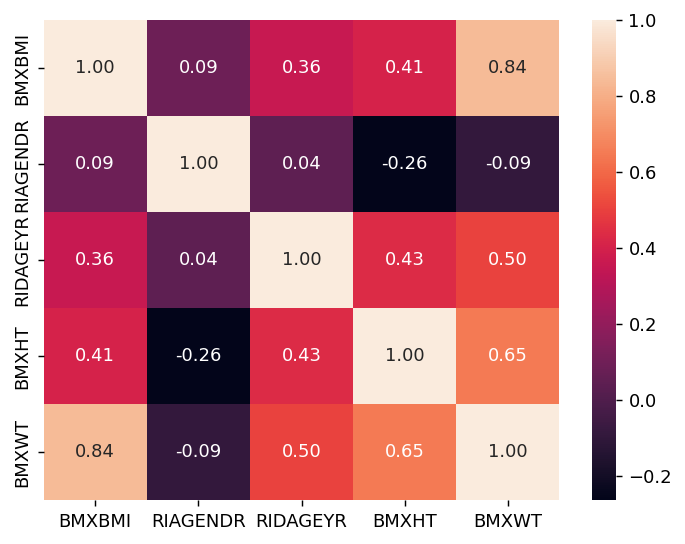

In [111]:

corr = df[cols].corr()

plt.figure(dpi=130)
sns.heatmap(df[cols].corr(), annot=True, fmt= '.2f')
plt.show()